In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
img_rgb=cv2.imread('images/f16.jpg')
img_gray=cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template=cv2.imread('images/f16_template.jpg', 0)
h, w=template.shape[::]

In [4]:
h

144

In [5]:
w

148

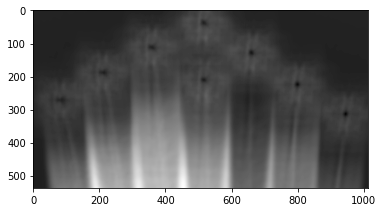

In [6]:
res=cv2.matchTemplate(img_gray, template, cv2.TM_SQDIFF)
plt.imshow(res, cmap="gray")

In [7]:
min_val, max_val, min_loc, max_loc=cv2.minMaxLoc(res)

In [8]:
min_val

59808.0

In [9]:
 max_val

193673184.0

In [10]:
min_loc

(945, 313)

In [11]:
 max_loc

(454, 536)

In [12]:
top_left = min_loc  #Change to max_loc for all except for TM_SQDIFF
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img_gray, top_left, bottom_right, 255, 2)  #White rectangle with thickness 2. 

cv2.imshow("Matched image", img_gray)
cv2.waitKey()
cv2.destroyAllWindows()

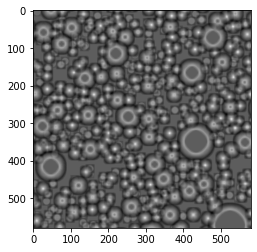

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('images/bubbles.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('images/bubbles_template.png',0)
h, w = template.shape[::]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
plt.imshow(res, cmap='gray')

threshold = 0.8 #Pick only values above 0.8. For TM_CCOEFF_NORMED, larger values = good fit.

loc = np.where( res >= threshold)  
#Outputs 2 arrays. Combine these arrays to get x,y coordinates - take x from one array and y from the other.

#Reminder: ZIP function is an iterator of tuples where first item in each iterator is paired together,
#then the second item and then third, etc. 

for pt in zip(*loc[::-1]):   #-1 to swap the values as we assign x and y coordinate to draw the rectangle. 
    #Draw rectangle around each object. We know the top left (pt), draw rectangle to match the size of the template image.
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)  #Red rectangles with thickness 2. 

cv2.imwrite('images/template_matched.jpg', img_rgb)
cv2.imshow("Matched image", img_rgb)
cv2.waitKey()
cv2.destroyAllWindows()